<a href="https://colab.research.google.com/github/Ramudgar/PlantDiseaseDetection-Rice-/blob/vgg19/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
import os
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
len(os.listdir("/content/drive/MyDrive/thesis/riceplantdisease_project"))

3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

train_datagen = ImageDataGenerator( rotation_range=40,shear_range=0.2,
                                   zoom_range=0.2,horizontal_flip=True,
                                   preprocessing_function=preprocess_input)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train=train_datagen.flow_from_directory(
        "/content/drive/MyDrive/thesis/riceplantdisease_project/Train"
        ,  # directory with training data
        target_size=(256, 256),  # resize images to 256x256
        batch_size=32) 
val=val_datagen.flow_from_directory(
        "/content/drive/MyDrive/thesis/riceplantdisease_project/Validatoin", 
         # directory with training data
        target_size=(256, 256),  # resize images to 256x256
        batch_size=32) 
test=test_datagen.flow_from_directory(
        "/content/drive/MyDrive/thesis/riceplantdisease_project/Test",
          # directory with training data
        target_size=(256, 256),  # resize images to 256x256
        batch_size=32) 

Found 6051 images belonging to 7 classes.
Found 1854 images belonging to 7 classes.
Found 1039 images belonging to 7 classes.


In [ ]:
class_indices = train.class_indices
class_names = {v: k for k, v in class_indices.items()}

In [ ]:
# training data
t_img,label=train.next()
print(t_img.shape)
print(label.shape)
print(len(t_img))

(32, 256, 256, 3)
(32, 7)
32


In [ ]:
# validation data
img,labels=val.next()
print(len(img))

32


In [ ]:
# for plotting image
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    # plt.imshow(im/255) #to see difference discomment
    plt.show()


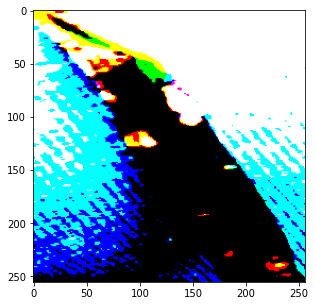

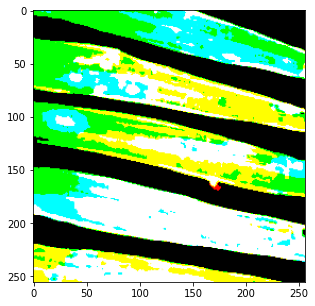

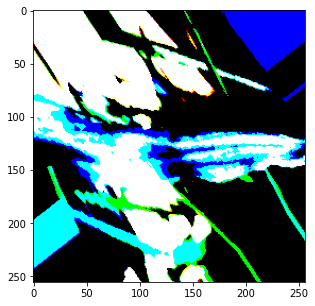

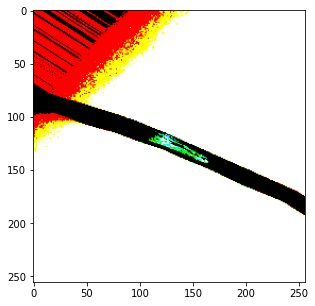

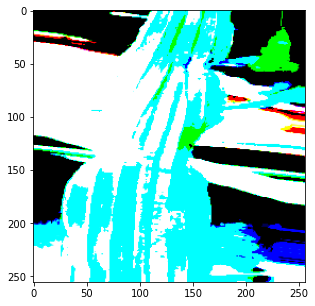

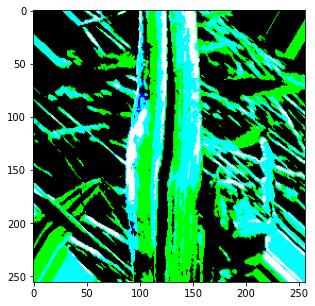

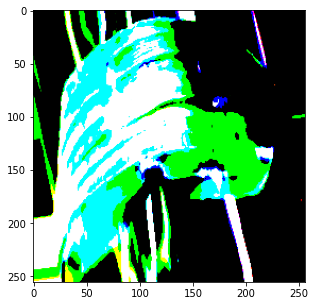

In [ ]:
# for trainign data
plotImage(t_img[:7],label[:7])

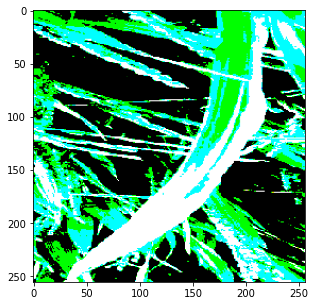

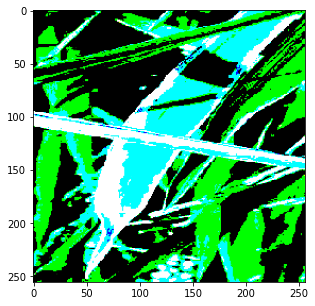

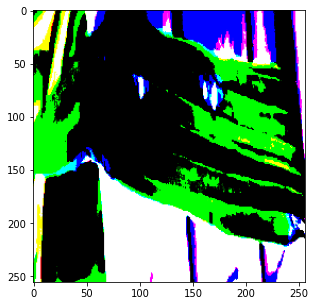

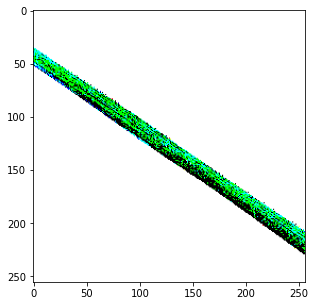

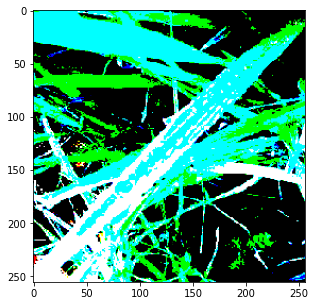

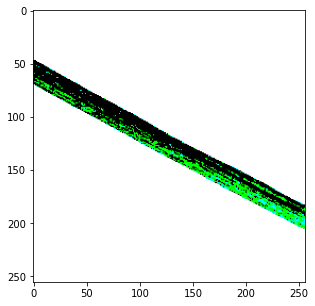

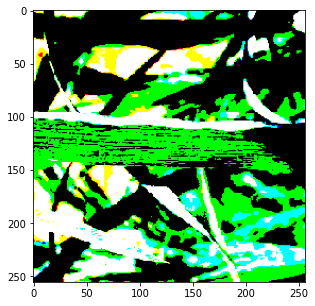

In [ ]:
# for validation data
plotImage(img[:7],labels[:7])


In [ ]:
# Building Model
import tensorflow
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras


In [ ]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
# to view the model
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:


X=Flatten()(base_model.output)
X = Dropout(0.2)(X)
X=Dense(units=7,activation="softmax" )(X)

# creating model

model=Model(base_model.input,X)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])



#EARLY STOPPING MODEL CHECKPOINT

 
 



In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#early stopping 
es= EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1)

#Model checkpoint
mc=ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy",
                   min_delta=0.01,
                   patience=3,verbose=1,
                   save_best_only=True)
cb=[es,mc]

In [ ]:
his=model.fit(train,
                        steps_per_epoch=16,
                        epochs=50,
                        verbose=1,
                        callbacks=cb,
                        validation_data=val,
                        validation_steps=16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 1.0887 - accuracy: 0.8945
Epoch 1: val_accuracy did not improve from 0.92969
16/16 [==============================] - 126s 8s/step - loss: 1.0887 - accuracy: 0.8945 - val_loss: 1.2287 - val_accuracy: 0.8926
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 1.3452 - accuracy: 0.8867
Epoch 2: val_accuracy did not improve from 0.92969
16/16 [==============================] - 97s 6s/step - loss: 1.3452 - accuracy: 0.8867 - val_loss: 1.6297 - val_accuracy: 0.8906
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 1.0954 - accuracy: 0.9006
Epoch 3: val_accuracy did not improve from 0.92969
16/16 [==============================] - 87s 6s/step - loss: 1.0954 - accuracy: 0.9006 - val_loss: 1.6093 - val_accuracy: 0.8984
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 0.7869 - accuracy: 0.9110
Epoch 4: val_accuracy improved from 0.92969 to 0.95312, saving model to best_model.

In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

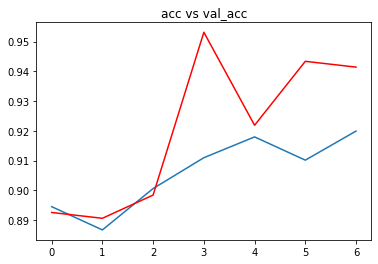

In [ ]:
# plotting value of accuracy vs validation accuracy
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"],c="red")
plt.title("acc vs val_acc")
plt.show()

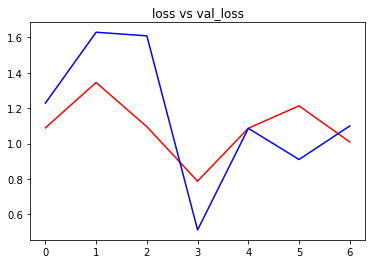

In [ ]:
# plotting value of loss vs validation loss
plt.plot(h["loss"],c='red')
plt.plot(h["val_loss"],c="blue")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model
model=load_model('/content/best_model.h5')

In [ ]:
#Evaluate model
acc=model.evaluate(test)[1]
print(f"the accuracy of your model is ={acc*100}%")

33/33 [==============================] - 33s 998ms/step - loss: 1.2367 - accuracy: 0.9240
the accuracy of your model is =92.3965334892273%


In [ ]:
ref=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
from keras_preprocessing.image.utils import load_img
# prediction
def prediction(path):
  img=load_img(path,target_size=(256,256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img=np.expand_dims(im,axis=0)
  pred=np.argmax(model.predict(img))
  print(f"The disease detected is {ref[pred]}")

In [ ]:
path="/content/drive/MyDrive/thesis/riceplantdisease_project/Test/BLAST/BLAST1_001.jpg"
prediction(path)

1/1 [==============================] - 0s 132ms/step
The disease detected is BROWNSPOT
